# K Nearest Neighbours (KNN)

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset = pd.read_csv('/content/Dataset_master.xlsx - Loan Distribution KNN Classific.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
dataset.head()

,Existing Loans,Credit Score,Loan Given
0,0,84,0
1,0,100,0
2,0,100,0
3,0,106,0
4,0,112,0


## Splitting the dataset into Training & Test set

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

In [7]:
print(X_train)

[[  0 334]
 [  0 295]
 [  0 445]
 [  0 456]
 [  1 860]
 [  0 395]
 [  0 400]
 [  0 406]
 [  0 439]
 [  0 239]
 [  0 184]
 [  0 445]
 [  2 750]
 [  2 812]
 [  0 123]
 [  0 334]
 [  0 200]
 [  0 156]
 [  0 434]
 [  0 328]
 [  1 345]
 [  0 112]
 [  0 300]
 [  0 439]
 [  1 489]
 [  1 489]
 [  0 323]
 [  1 495]
 [  1 795]
 [  2 896]
 [  0 217]
 [  0 128]
 [  0 234]
 [  0 200]
 [  0 245]
 [  0 456]
 [  0 439]
 [  2 567]
 [  0 284]
 [  1 745]
 [  1 745]
 [  0 362]
 [  0 239]
 [  0 400]
 [  0 489]
 [  0 362]
 [  2 589]
 [  0 189]
 [  2 845]
 [  1 795]
 [  0 456]
 [  0  84]
 [  0 100]
 [  0 362]
 [  0 267]
 [  0 412]
 [  0 439]
 [  0 489]
 [  1 628]
 [  0 400]
 [  0 395]
 [  0 600]
 [  1 534]
 [  0 407]
 [  0 234]
 [  0 478]
 [  0 317]
 [  0 178]
 [  0 517]
 [  2 600]
 [  0 217]
 [  0 123]
 [  2 892]
 [  1 728]
 [  0 112]
 [  0 195]
 [  1 495]
 [  3 890]
 [  2 890]
 [  0 578]
 [  0 112]
 [  0 445]
 [  0 217]
 [  0 623]
 [  0 317]
 [  0 462]
 [  2 867]
 [  0 662]
 [  0 334]
 [  0 700]
 [  0 323]

In [8]:
print(X_test)

[[  0 123]
 [  1 767]
 [  0 445]
 [  2 850]
 [  0 528]
 [  2 888]
 [  2 745]
 [  0 395]
 [  1 739]
 [  1 723]
 [  0 334]
 [  0 145]
 [  2 834]
 [  0 184]
 [  0 212]
 [  0 262]
 [  0 306]
 [  1 728]
 [  0 412]
 [  1 639]
 [  1 362]
 [  0 156]
 [  1 650]
 [  0 562]
 [  0 406]
 [  0 389]
 [  1 800]
 [  0 678]
 [  3 892]
 [  0 423]
 [  0 445]
 [  1 350]
 [  0 145]
 [  0 828]
 [  2 838]
 [  0 439]
 [  0 817]
 [  0 439]
 [  0 439]
 [  1 500]
 [  1 495]
 [  2 888]
 [  0 500]
 [  2 894]
 [  0 495]
 [  1 628]]


In [9]:
print(y_train)

[1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]


In [10]:
print(y_test)

[0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 1 1]


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
print(X_train)

[[-0.55891365 -0.54570412]
 [-0.55891365 -0.71475415]
 [-0.55891365 -0.0645617 ]
 [-0.55891365 -0.01688092]
 [ 0.73088709  1.73430408]
 [-0.55891365 -0.28129252]
 [-0.55891365 -0.25961944]
 [-0.55891365 -0.23361174]
 [-0.55891365 -0.0905694 ]
 [-0.55891365 -0.95749267]
 [-0.55891365 -1.19589657]
 [-0.55891365 -0.0645617 ]
 [ 2.02068783  1.25749628]
 [ 2.02068783  1.5262425 ]
 [-0.55891365 -1.46030817]
 [-0.55891365 -0.54570412]
 [-0.55891365 -1.12654271]
 [-0.55891365 -1.31726583]
 [-0.55891365 -0.11224248]
 [-0.55891365 -0.57171182]
 [ 0.73088709 -0.49802334]
 [-0.55891365 -1.50798895]
 [-0.55891365 -0.69308107]
 [-0.55891365 -0.0905694 ]
 [ 0.73088709  0.12616142]
 [ 0.73088709  0.12616142]
 [-0.55891365 -0.5933849 ]
 [ 0.73088709  0.15216912]
 [ 0.73088709  1.45255402]
 [ 2.02068783  1.89035027]
 [-0.55891365 -1.05285423]
 [-0.55891365 -1.43863509]
 [-0.55891365 -0.97916575]
 [-0.55891365 -1.12654271]
 [-0.55891365 -0.93148497]
 [-0.55891365 -0.01688092]
 [-0.55891365 -0.0905694 ]
 

In [14]:
print(X_test)

[[-0.77148399 -1.77770536]
 [ 0.45224923  0.9854377 ]
 [-0.77148399 -0.39613383]
 [ 1.67598246  1.34155707]
 [-0.77148399 -0.04001446]
 [ 1.67598246  1.50459967]
 [ 1.67598246  0.89104461]
 [-0.77148399 -0.61066357]
 [ 0.45224923  0.86530104]
 [ 0.45224923  0.79665153]
 [-0.77148399 -0.87238985]
 [-0.77148399 -1.68331227]
 [ 1.67598246  1.27290755]
 [-0.77148399 -1.51597907]
 [-0.77148399 -1.39584242]
 [-0.77148399 -1.18131268]
 [-0.77148399 -0.99252651]
 [ 0.45224923  0.8181045 ]
 [-0.77148399 -0.53772346]
 [ 0.45224923  0.43624156]
 [ 0.45224923 -0.7522532 ]
 [-0.77148399 -1.63611573]
 [ 0.45224923  0.48343811]
 [-0.77148399  0.10586576]
 [-0.77148399 -0.56346703]
 [-0.77148399 -0.63640714]
 [ 0.45224923  1.12702733]
 [-0.77148399  0.60357476]
 [ 2.89971568  1.52176205]
 [-0.77148399 -0.49052692]
 [-0.77148399 -0.39613383]
 [ 0.45224923 -0.80374034]
 [-0.77148399 -1.68331227]
 [-0.77148399  1.24716398]
 [ 1.67598246  1.29006993]
 [-0.77148399 -0.4218774 ]
 [-0.77148399  1.19996744]
 

## KNN Training on Training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier( n_neighbors = 5 ,metric = 'minkowski', p =2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Predicting

In [17]:
print(classifier.predict(sc.transform([[3,730]])))

[0]


## Predicting Test set results

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


## Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[23 12]
 [ 0 11]]


0.7391304347826086

## Visualizing Test Set results

<ipython-input-21-97aa950a5566>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


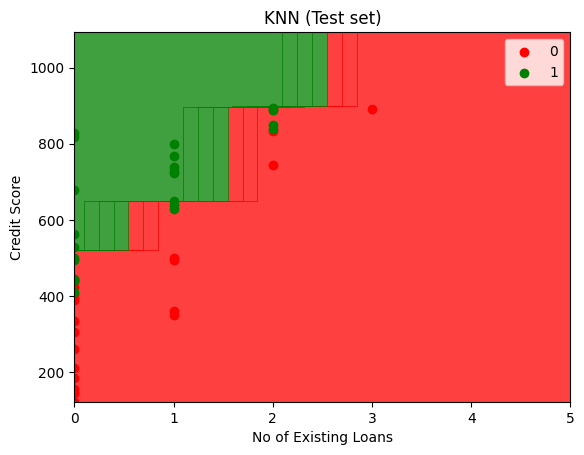

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

## Visualising Training set results

<ipython-input-22-a28b5b98936d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


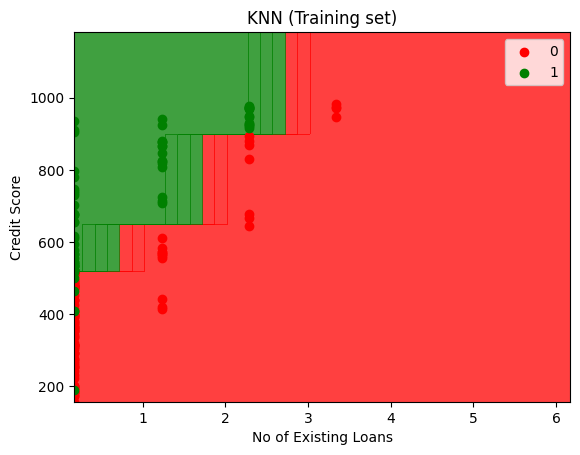

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()